In [43]:
print(__doc__)

Automatically created module for IPython interactive environment


In [44]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile
from sklearn.decomposition import FastICA

from IPython.display import Audio

# Get samples from wav files

5564.16372545


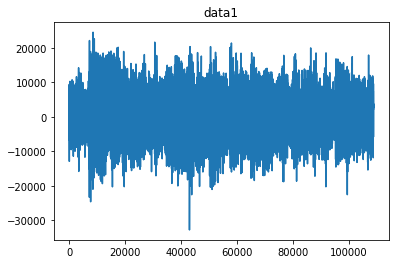

2619.18445716


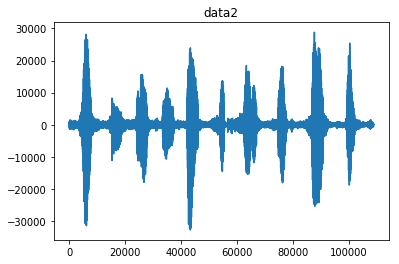

In [45]:
sourceFilesPrefix="ExpectedResults\\music-"
resultFilesPrefix="AudioResults\\fromExpected-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()


In [46]:
Audio(sourceFilesPrefix+"1.wav")

In [47]:
Audio(sourceFilesPrefix+"2.wav")

[-2896 -2354 -1967 ...,  3136  3623  2741]
[424 646 433 ..., 238 225  81]
108911
108911


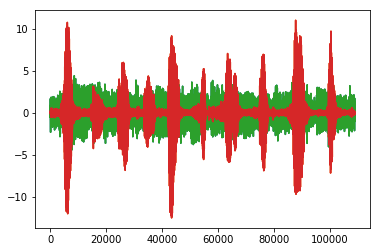

In [48]:
print(sample1_data)
print(sample2_data)
print(len(sample1_data))
print(len(sample2_data))
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]
#print(S)
#median=S.std(axis=0)
#print(median)
#S= S/median

#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

#print(S)
plt.figure()
plt.plot(S1)
plt.plot(S2)
plt.show()

In [49]:
#print(S)
mixingMatrix1=np.array([[2,5]])
mixingMatrix2=np.array([[0.5,3]])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
X=np.c_[X1,X2]
ica = FastICA(n_components=2,whiten=True,max_iter=300)
S_=ica.fit_transform(X)
A_=ica.mixing_
M_=ica.mean_
print(X)
print(A_)
print(M_)

[[-0.23153483  0.22541058]
 [ 0.38707935  0.52839274]
 [ 0.11956869  0.31919978]
 ..., 
 [ 1.58155331  0.55440729]
 [ 1.7317852   0.58327935]
 [ 1.13986169  0.33908532]]
[[ 1645.833347     670.28854144]
 [  988.97631948   171.16617582]]
[ 0.00100518  0.00065198]


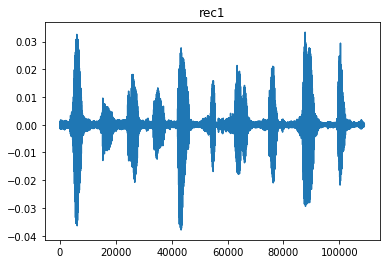

[  4.99637593e-04   7.54628620e-04   5.06901140e-04 ...,   2.64014955e-04
   2.47325035e-04   8.37230926e-05]


In [50]:
plt.figure(3)
plt.plot(S_.T[0])
plt.title("rec1")
plt.show()
print(S_.T[0])

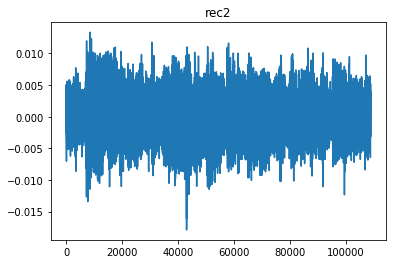

[-0.00157374 -0.00127694 -0.00106777 ...,  0.00170975  0.00197486
  0.00149348]


In [84]:
plt.figure(4)
plt.plot(S_.T[1])
plt.title("rec2")
plt.show()
print(S_.T[1])

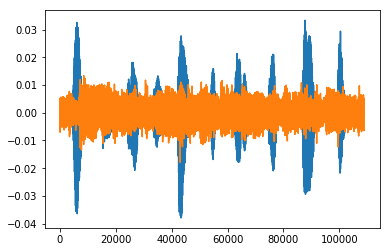

In [52]:
plt.figure(3)
plt.plot(S_.T[0])
plt.plot(S_.T[1])
plt.show()

In [75]:
scipy.io.wavfile.write(resultFilesPrefix+"1.wav",16000,S_.T[0]*2)

In [81]:
scipy.io.wavfile.write(resultFilesPrefix+"2.wav",16000,S_.T[1]*2)

In [82]:
Audio(data=S_.T[0]*2, rate=16000)

In [83]:
Audio(data=S_.T[1]*2, rate=16000)